<a href="https://colab.research.google.com/github/axiomjo/Exploring_Basic_Machine_Learning_Models/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Josephine_Dermawan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:


#ini buat dataframe
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

#ini buat modelling
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN

#ini buat ngukur
from sklearn.metrics import silhouette_score

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head(5)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [6]:
#====================== TEST RUN STARTS HERE =====================
#=======================

In [7]:
# Create a deep copy of the DataFrame df
NYOBA = df.copy(deep=True)

# Display the head of the new DataFrame to verify
display(NYOBA.head())

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [8]:
NYOBA['TransactionDate'] = pd.to_datetime(NYOBA['TransactionDate'])
NYOBA['PreviousTransactionDate'] = pd.to_datetime(NYOBA['PreviousTransactionDate'])


In [9]:
NYOBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

In [10]:
# prompt: choosing only collumns with float64 and datetime64 datatypes to be feeded into correclation matrix

# Select only columns with float64 and datetime64 dtypes
df_corr = NYOBA.select_dtypes(include=['float64', 'datetime64[ns]'])

# You can optionally display the info of the selected DataFrame to verify
df_corr.info()

# You can now calculate the correlation matrix on df_corr
# For demonstration purposes, let's show how to calculate a correlation matrix
# Note: Correlation matrix is typically calculated on numerical data.
# You might need to handle datetime columns depending on your analysis.
# If you want to calculate correlation between numerical columns only:
kolom_angka = NYOBA.select_dtypes(include=['float64','datetime64'])
dataframe_correlation_matrix = kolom_angka.corr().round(2)
display(dataframe_correlation_matrix)

# If you need to use datetime columns for correlation (which is less common directly)
# you might need to extract features like timestamp or convert them to numerical representations.
# For this task, focusing on the instruction to select float64 and datetime64:
print("\nDataFrame with float64 and datetime64 columns for potential correlation analysis:")
display(dataframe_correlation_matrix.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionAmount        2511 non-null   float64       
 1   TransactionDate          2509 non-null   datetime64[ns]
 2   CustomerAge              2519 non-null   float64       
 3   TransactionDuration      2511 non-null   float64       
 4   LoginAttempts            2516 non-null   float64       
 5   AccountBalance           2510 non-null   float64       
 6   PreviousTransactionDate  2513 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(5)
memory usage: 138.9 KB


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
TransactionAmount,1.00,-0.02,-0.02,0.00,-0.01,-0.03,0.00
TransactionDate,-0.02,1.00,-0.01,0.02,0.02,0.03,-0.01
CustomerAge,-0.02,-0.01,1.00,-0.01,0.01,0.32,0.06
TransactionDuration,0.00,0.02,-0.01,1.00,0.03,0.01,-0.00
LoginAttempts,-0.01,0.02,0.01,0.03,1.00,0.01,-0.01
AccountBalance,-0.03,0.03,0.32,0.01,0.01,1.00,0.02
PreviousTransactionDate,0.00,-0.01,0.06,-0.00,-0.01,0.02,1.00



DataFrame with float64 and datetime64 columns for potential correlation analysis:


,TransactionAmount,TransactionDate,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
TransactionAmount,1.00,-0.02,-0.02,0.00,-0.01,-0.03,0.00
TransactionDate,-0.02,1.00,-0.01,0.02,0.02,0.03,-0.01
CustomerAge,-0.02,-0.01,1.00,-0.01,0.01,0.32,0.06
TransactionDuration,0.00,0.02,-0.01,1.00,0.03,0.01,-0.00
LoginAttempts,-0.01,0.02,0.01,0.03,1.00,0.01,-0.01


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

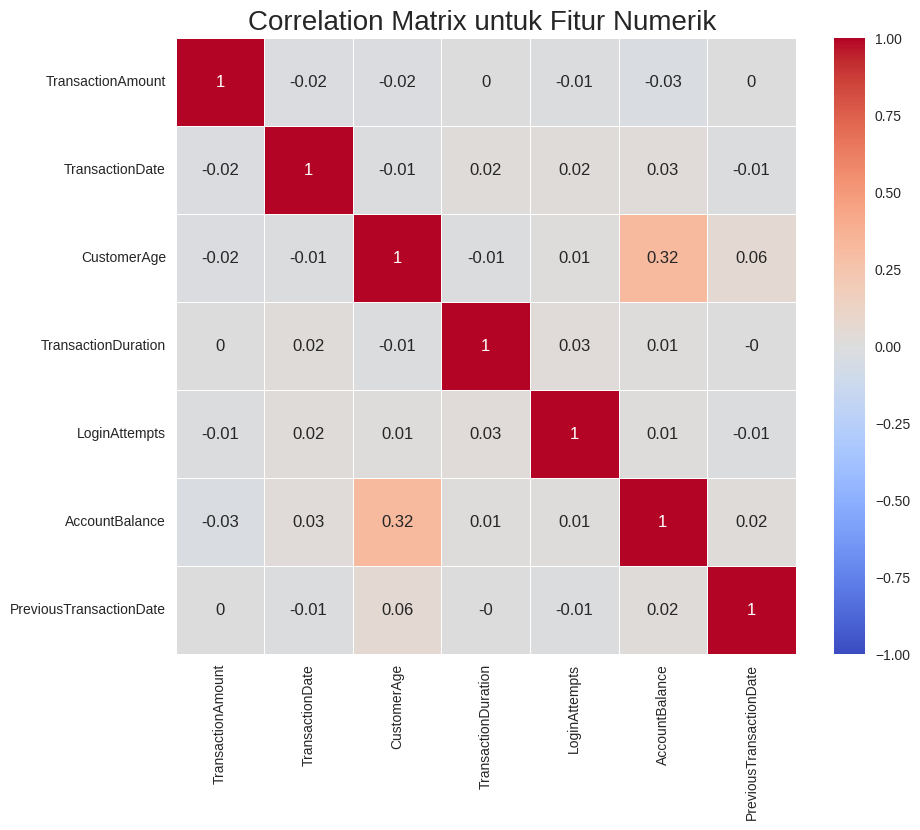

In [11]:
mpl.figure(figsize=(10, 8))

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sb.heatmap(data= dataframe_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1, vmax=1 )
mpl.title("Correlation Matrix untuk Fitur Numerik ", size=20)

array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'TransactionDate'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>,
        <Axes: title={'center': 'AccountBalance'}>],
       [<Axes: title={'center': 'PreviousTransactionDate'}>, <Axes: >,
        <Axes: >]], dtype=object)

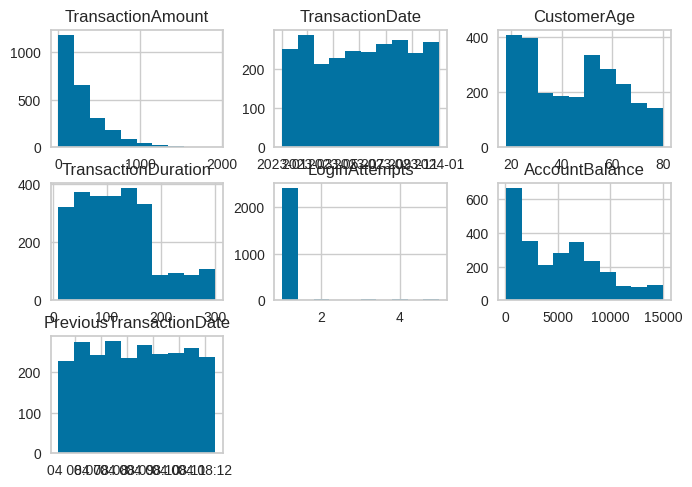

In [12]:
NYOBA.hist()

In [ ]:
for tiap_kolom in enumerate(kolom_angka):


#-------======= skrg yg fitur kstegoriksl objeccccct =======================
# ========

In [1]:

def analisa_isi_kolom(dataframenya, kolomnya):
  """
  bikin dataframe summary value count isi data kolomnya dataframenya
  """
  temp_kelompokan = dataframenya[kolomnya].value_counts()
  temp_kelompokan_udhpersen = 100 * dataframenya[kolomnya].value_counts(normalize=True)

  df_chart = pd.DataFrame({
      'banyak': temp_kelompokan,
      'persen_thdp_semua': temp_kelompokan_udhpersen.round(2)
  })

  print(df_chart)

#===================== modularisasi supaya enak

kolom_objek = NYOBA.select_dtypes(include=['object'])
banyak_kolomnya = len(kolom_objek)

fig, axes = mpl.subplots(banyak_kolomnya, 1, figsize=(8, banyak_kolomnya * 4.5))

for tiap_kolom in enumerate(kolom_objek):
    analisa_isi_kolom(NYOBA, tiap_kolom)

NameError: name 'NYOBA' is not defined

In [ ]:
analisa_isi_kolom(NYOBA, tiap_kolom)

In [ ]:
#====================== TEST ENDs HERE =====================
#=======================

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)


In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()

In [ ]:
# Mengecek dataset menggunakan duplicated().sum()

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

In [ ]:
# Menggunakan algoritma K-Means Clustering

Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [ ]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)